In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
np.random.seed(0)

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import eli5

import gc

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import csv file with data
df2015 = pd.read_csv('Zdarzenia2015.csv',delimiter=';')
df2016 = pd.read_csv('Zdarzenia2016.csv',delimiter=';')
df2017 = pd.read_csv('Zdarzenia2017.csv',delimiter=';')
df2018 = pd.read_csv('Zdarzenia2018.csv',delimiter=';')
df2019 = pd.read_csv('Zdarzenia2019.csv',delimiter=';')
df2020 = pd.read_csv('Zdarzenia2020.csv',delimiter=';')
df2021 = pd.read_csv('Zdarzenia2021.csv',delimiter=';')
df2022 = pd.read_csv('Zdarzenia2022.csv',delimiter=';')

C:\Users\artur\AppData\Local\Temp\ipykernel_26992\270019601.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df2016 = pd.read_csv('Zdarzenia2016.csv',delimiter=';')


In [3]:
df = pd.concat([df2015, df2016, df2017, df2018, df2019, df2020, df2021, df2022]).reset_index(drop=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499245 entries, 0 to 3499244
Data columns (total 32 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   IDKSIP zdarzenia                   object 
 1   ID zdarzenia                       int64  
 2   Data zdarzenia                     object 
 3   Powiat                             object 
 4   Gmina                              object 
 5   Wojewodztwo                        object 
 6   Miejscowość                        object 
 7   Ulica                              object 
 8   Numer domu                         object 
 9   Numer drogi                        object 
 10  KM HM (Pikietaż)                   object 
 11  Rondo/węzeł                        object 
 12  Skrzyżowanie z ulicą               object 
 13  Skrzyżowanie z drogą               object 
 14  Odległość do skrzyżowania          float64
 15  GPS x                              object 
 16  GPS y             

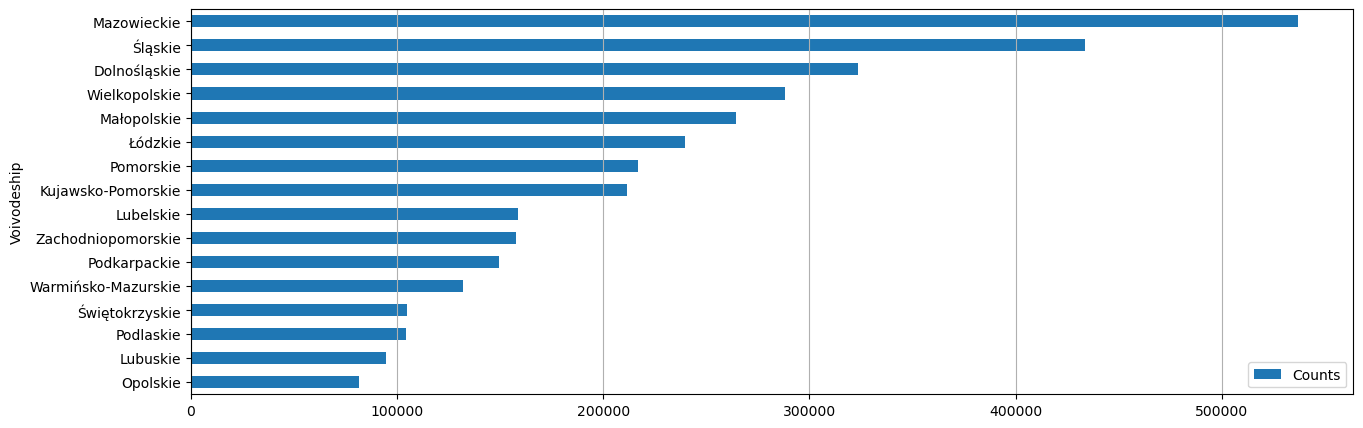

In [5]:
df_w = df['Wojewodztwo'].value_counts().rename_axis('Wojewodztwo').reset_index(name='Counts')
df_w = df_w.rename(columns={"Wojewodztwo": "Voivodeship"})
df_w = df_w.replace({"WOJ. OPOLSKIE": "Opolskie", "WOJ. LUBUSKIE": "Lubuskie","WOJ. PODLASKIE": "Podlaskie", 
                     "WOJ. ŚWIĘTOKRZYSKIE": "Świętokrzyskie", "WOJ. WARMIŃSKO-MAZURSKIE": "Warmińsko-Mazurskie",
                     "WOJ. PODKARPACKIE": "Podkarpackie", "WOJ. ZACHODNIOPOMORSKIE":"Zachodniopomorskie", 
                     "WOJ. LUBELSKIE": "Lubelskie", "WOJ. KUJAWSKO-POMORSKIE": "Kujawsko-Pomorskie",
                     "WOJ. POMORSKIE": "Pomorskie", "WOJ. ŁÓDZKIE": "Łódzkie", "WOJ. MAŁOPOLSKIE": "Małopolskie",
                     "WOJ. WIELKOPOLSKIE": "Wielkopolskie", "WOJ. DOLNOŚLĄSKIE": "Dolnośląskie", "WOJ. ŚLĄSKIE": "Śląskie",
                     "WOJ. MAZOWIECKIE": "Mazowieckie"})
df_w = df_w.sort_values(by=['Counts'])
ay = df_w.plot.barh(x = "Voivodeship", y = "Counts",rot=0,figsize = (15, 5))
ay.grid(axis='x')

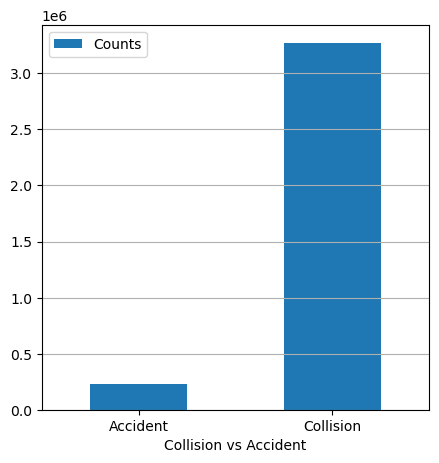

In [6]:
df_i = df['Wypadek/Kolizja'].value_counts().rename_axis('Wypadek/Kolizja').reset_index(name='Counts')
df_i = df_i.rename(columns={"Wypadek/Kolizja": "Collision vs Accident"})
df_i = df_i.replace({"Kolizja": "Collision", "Wypadek": "Accident"})
df_i = df_i.sort_values(by=['Counts'])
by = df_i.plot.bar(x = "Collision vs Accident", y = "Counts",rot=0,figsize = (5, 5))
by.grid(axis='y')

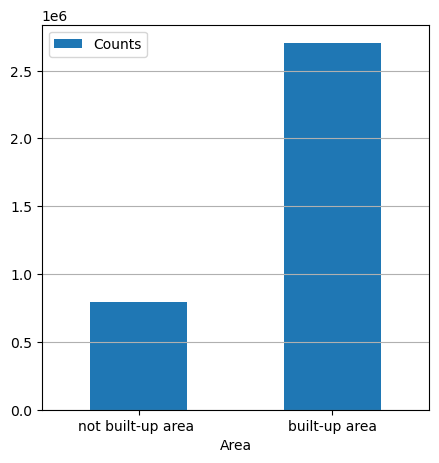

In [7]:
df_o = df['Obszar'].value_counts().rename_axis('Obszar').reset_index(name='Counts')
df_o = df_o.rename(columns={"Obszar": "Area"})
df_o = df_o.replace({"Obszar niezabudowany": "not built-up area ", "Obszar zabudowany": "built-up area"})
df_o = df_o.sort_values(by=['Counts'])
cy = df_o.plot.bar(x = "Area", y = "Counts",rot=0,figsize = (5, 5))
cy.grid(axis='y')

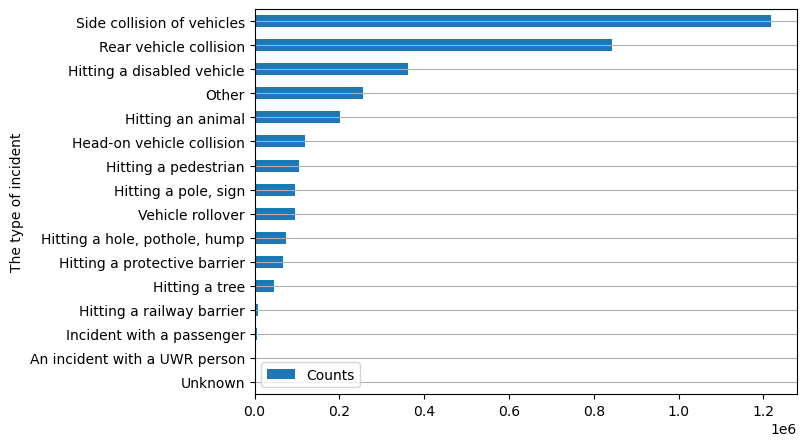

In [8]:
df_r = df['Rodzaj zdarzenia'].value_counts().rename_axis('Rodzaj zdarzenia').reset_index(name='Counts')
df_r = df_r.rename(columns={"Rodzaj zdarzenia": "The type of incident"})
df_r = df_r.replace({"Zderzenie pojazdów boczne":"Side collision of vehicles", 'Inne':"Other", 'Najechanie na pieszego':"Hitting a pedestrian",
       'Zderzenie pojazdów tylne':"Rear vehicle collision", 'Zdarzenie z pasażerem':"Incident with a passenger",
       'Najechanie na pojazd unieruchomiony':"Hitting a disabled vehicle", 'Najechanie na zwierzę':"Hitting an animal",
       'Zderzenie pojazdów czołowe':"Head-on vehicle collision", 'Wywrócenie się pojazdu':"Vehicle rollover",
       'Najechanie na barierę ochronną':"Hitting a protective barrier", 'Najechanie na słup, znak':"Hitting a pole, sign",
       'Najechanie na dziurę, wybój, garb':"Hitting a hole, pothole, hump", 'Najechanie na drzewo':"Hitting a tree",
           'Najechanie na zapore kolejową':"Hitting a railway barrier", 'Nieznane':"Unknown", 'Zdarzenie z osobą UWR':"An incident with a UWR person"})
df_r = df_r.sort_values(by=['Counts'])
cy = df_r.plot.barh(x = "The type of incident", y = "Counts",rot=0,figsize = (7, 5))
cy.grid(axis='y')

In [9]:
df['Rodzaj zdarzenia'].unique()

array(['Zderzenie pojazdów boczne', 'Inne', 'Najechanie na pieszego',
       'Zderzenie pojazdów tylne', 'Zdarzenie z pasażerem',
       'Najechanie na pojazd unieruchomiony', 'Najechanie na zwierzę',
       'Zderzenie pojazdów czołowe', 'Wywrócenie się pojazdu',
       'Najechanie na barierę ochronną', 'Najechanie na słup, znak',
       'Najechanie na dziurę, wybój, garb', 'Najechanie na drzewo',
       'Najechanie na zapore kolejową', 'Nieznane',
       'Zdarzenie z osobą UWR'], dtype=object)

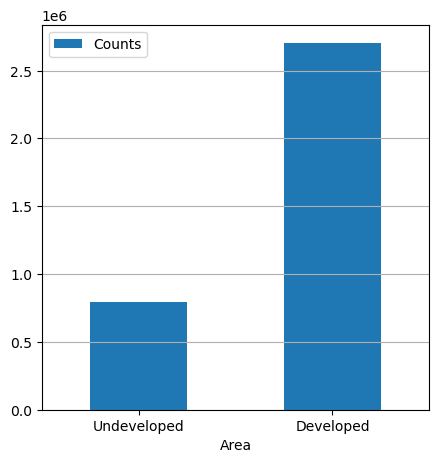

In [10]:
df_o = df['Obszar'].value_counts().rename_axis('Obszar').reset_index(name='Counts')
df_o = df_o.rename(columns={"Obszar": "Area"})
df_o = df_o.replace({"Obszar niezabudowany": "Undeveloped", "Obszar zabudowany": "Developed"})
df_o = df_o.sort_values(by=['Counts'])
cy = df_o.plot.bar(x = "Area", y = "Counts",rot=0,figsize = (5, 5))
cy.grid(axis='y')

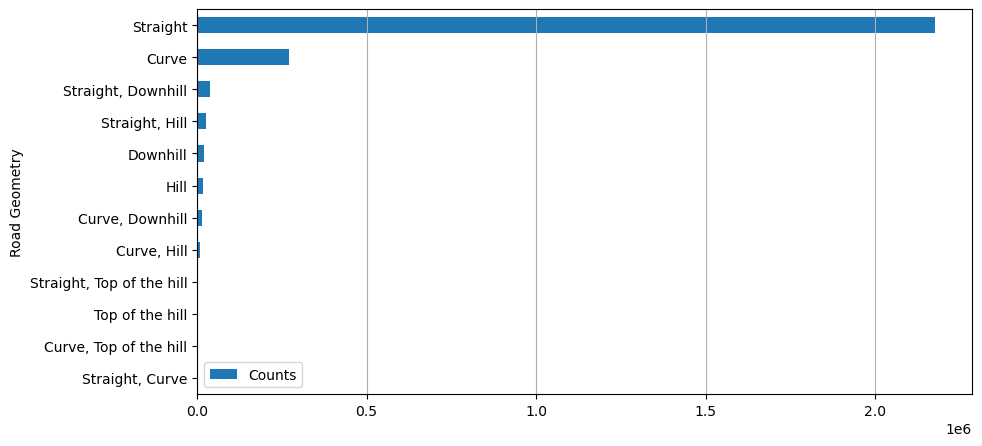

In [11]:
df_g = df['Geometria drogi'].value_counts().rename_axis('Geometria drogi').reset_index(name='Counts')
df_g = df_g.rename(columns={"Geometria drogi": "Road Geometry"})
df_g = df_g.replace({'Odcinek prosty': "Straight" , 'Zakręt, łuk': "Curve", 'Wierzchołek wzn.':"Top of the hill",
       'Odcinek prosty; Wzniesienie': "Straight, Hill", 'Zakręt, łuk; Wzniesienie': "Curve, Hill",
       'Zakręt, łuk; Spadek': "Curve, Downhill", 'Wzniesienie': "Hill", 'Spadek': "Downhill",
       'Odcinek prosty; Spadek': "Straight, Downhill", 'Odcinek prosty; Wierzchołek wzn.': "Straight, Top of the hill",
       'Zakręt, łuk; Wierzchołek wzn.': "Curve, Top of the hill", 'Odcinek prosty; Zakręt, łuk': 'Straight, Curve'})
df_g = df_g.sort_values(by=['Counts'])
dy = df_g.plot.barh(x = "Road Geometry", y = "Counts",rot=0,figsize = (10, 5))
dy.grid(axis='x')

In [12]:
df_g

,Road Geometry,Counts
11,"Straight, Curve",3
10,"Curve, Top of the hill",776
9,Top of the hill,880
8,"Straight, Top of the hill",2274
7,"Curve, Hill",9328
6,"Curve, Downhill",14652
5,Hill,17912
4,Downhill,21623
3,"Straight, Hill",25412
2,"Straight, Downhill",37322


In [13]:
df["Skrzyżowanie"].unique()

array([nan, 'O ruchu okrężnym', 'Z drogą z pierwsz.', 'Równorzędne'],
      dtype=object)

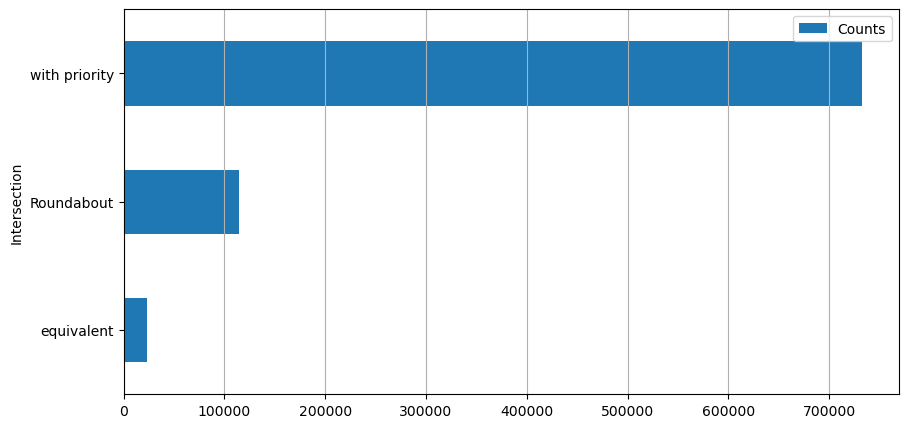

In [14]:
df_s = df['Skrzyżowanie'].value_counts().rename_axis('Skrzyżowanie').reset_index(name='Counts')
df_s = df_s.rename(columns={"Skrzyżowanie": "Intersection"})
df_s = df_s.replace({'O ruchu okrężnym': "Roundabout", 'Z drogą z pierwsz.':"with priority", 'Równorzędne':"equivalent"})
df_s = df_s.sort_values(by=['Counts'])
ey = df_s.plot.barh(x = "Intersection", y = "Counts",rot=0,figsize = (10, 5))
ey.grid(axis='x')

In [15]:
df['Powiat'] = df['Powiat'].fillna('OTHER')
df['Gmina'] = df['Gmina'].fillna('OTHER')
df['Wojewodztwo'] = df['Wojewodztwo'].fillna('OTHER')
df['Miejscowość'] = df['Miejscowość'].fillna('OTHER')
df['Ulica'] = df['Ulica'].fillna('OTHER')
df['Numer domu'] = df['Numer domu'].fillna('OTHER')
df['KM HM (Pikietaż)'] = df['KM HM (Pikietaż)'].fillna('OTHER')
df['Numer drogi'] = df['Numer drogi'].fillna('OTHER')
df['Rondo/węzeł'] = df['Rondo/węzeł'].fillna('OTHER')
df['Skrzyżowanie z ulicą'] = df['Skrzyżowanie z ulicą'].fillna('OTHER')
df['Skrzyżowanie z drogą'] = df['Skrzyżowanie z drogą'].fillna('OTHER')
df['GPS x'] = df['GPS x'].fillna('OTHER')
df['GPS y'] = df['GPS y'].fillna('OTHER')
df['Obszar'] = df['Obszar'].fillna('OTHER')
df['Geometria drogi'] = df['Geometria drogi'].fillna('OTHER')
df['Skrzyżowanie'] = df['Skrzyżowanie'].fillna('OTHER')
df['Prędkość dopuszczalna'] = df['Prędkość dopuszczalna'].fillna('OTHER')
df['Rodzaj drogi'] = df['Rodzaj drogi'].fillna('OTHER')
df['Nawierzchnia drogi'] = df['Nawierzchnia drogi'].fillna('OTHER')
df['Stan nawierzchni'] = df['Stan nawierzchni'].fillna('OTHER')
df['Sygnalizacja świetlna'] = df['Sygnalizacja świetlna'].fillna('OTHER')
df['Oznakowanie poziome'] = df['Oznakowanie poziome'].fillna('OTHER')
df['Inne przyczyny'] = df['Inne przyczyny'].fillna('OTHER')

In [16]:
df["Data zdarzenia"] = pd.to_datetime(df["Data zdarzenia"], dayfirst=True)

In [17]:
df['Wypadek/Kolizja'] = pd.factorize(df['Wypadek/Kolizja'])[0]

In [18]:
def get_feats(df, black_list = ["Wypadek/Kolizja", "IDKSIP zdarzenia", "ID zdarzenia"]):
    feats = df.select_dtypes(include=[int, float]).columns
    return [x for x in feats if x not in black_list]

def feature_engineering(df):
    df['Year'] = df['Data zdarzenia'].dt.year
    df['Month'] = df['Data zdarzenia'].dt.month
    df['Week'] = df['Data zdarzenia'].dt.isocalendar().week
    df['Weekday'] = df['Data zdarzenia'].dt.weekday
    df['Day'] = df['Data zdarzenia'].dt.day
    df['Dayofyear'] = df['Data zdarzenia'].dt.dayofyear
    df['County'] = pd.factorize(df['Powiat'])[0]
    df['Community'] = pd.factorize(df['Gmina'])[0]
    df['Voivodeship'] = pd.factorize(df['Wojewodztwo'])[0]
    df['Street'] = pd.factorize(df['Ulica'])[0]
    df['House Number'] = pd.factorize(df['Numer domu'])[0]
    df['Road Number'] = pd.factorize(df['Numer drogi'])[0] 
    #df['KM HM (Chainage)'] = pd.factorize(df['KM HM (Pikietaż)'])[0]
    df['Roundabout / Junction'] = pd.factorize(df['Rondo/węzeł'])[0]
    df['Intersection with the street'] = pd.factorize(df['Skrzyżowanie z ulicą'])[0]
    df['Intersection with the road'] = pd.factorize(df['Skrzyżowanie z drogą'])[0]
    #df['GPS x'] = pd.factorize(df['GPS x'])[0]
    #df['GPS y'] = pd.factorize(df['GPS y'])[0]
    df['Area'] = pd.factorize(df['Obszar'])[0]
    df['Road geometry'] = pd.factorize(df['Geometria drogi'])[0]
    df['Intersection'] = pd.factorize(df['Skrzyżowanie'])[0]
    df['Characteristics of the place of the event'] = pd.factorize(df['Charakterystyka miejsca zdarzenia'])[0]
    df['Lighting'] = pd.factorize(df['Oświetlenie'])[0]
    df['Atmospheric conditions'] = pd.factorize(df['Warunki atmosferyczne'])[0]
    df['The type of incident'] = pd.factorize(df['Rodzaj zdarzenia'])[0]
    #df['Speed limit'] = pd.factorize(df['Prędkość dopuszczalna'])[0]
    df['Type of road'] = pd.factorize(df['Rodzaj drogi'])[0]
    df['Road surface'] = pd.factorize(df['Nawierzchnia drogi'])[0]
    df['The condition of the surface'] = pd.factorize(df['Stan nawierzchni'])[0]
    df['Traffic lights'] = pd.factorize(df['Sygnalizacja świetlna'])[0]
    df['Marking'] = pd.factorize(df['Oznakowanie poziome'])[0]
    df['Other reasons'] = pd.factorize(df['Inne przyczyny'])[0]
       

    return df
    
def train_and_check_model(df, model):
    df = feature_engineering(df)
    feats = get_feats(df)
        
    X = df[feats].fillna(-1).values
    y = df["Wypadek/Kolizja"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

    print(model)
    print("Features:", feats)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cf_matrix = confusion_matrix(y_test, y_pred)
    
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = ["{}\n{}\n{}".format(v1, v2, v3) for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(10, 5))
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues', annot_kws={"fontsize":15});
    plt.plot()
    
    print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print()
    print(classification_report(y_test, y_pred, target_names=["Wypadek", "Kolizja"]))
    
    return eli5.show_weights(model, feature_names=feats, top=10)

DecisionTreeClassifier(max_depth=5, random_state=0)
Features: ['Odległość do skrzyżowania', 'Year', 'Month', 'Weekday', 'Day', 'Dayofyear', 'County', 'Community', 'Voivodeship', 'Street', 'House Number', 'Road Number', 'Roundabout / Junction', 'Intersection with the street', 'Intersection with the road', 'Area', 'Road geometry', 'Intersection', 'Characteristics of the place of the event', 'Lighting', 'Atmospheric conditions', 'The type of incident', 'Type of road', 'Road surface', 'The condition of the surface', 'Traffic lights', 'Marking', 'Other reasons']
Accuracy: 0.936914993131855

              precision    recall  f1-score   support

     Wypadek       0.60      0.12      0.20     68918
     Kolizja       0.94      0.99      0.97    980856

    accuracy                           0.94   1049774
   macro avg       0.77      0.56      0.58   1049774
weighted avg       0.92      0.94      0.92   1049774



Weight,Feature
0.9059,The type of incident
0.0316,Characteristics of the place of the event
0.0138,Road Number
0.0132,Intersection
0.0122,Street
0.0079,Lighting
0.0056,The condition of the surface
0.0038,County
0.0026,Year
0.0019,Voivodeship


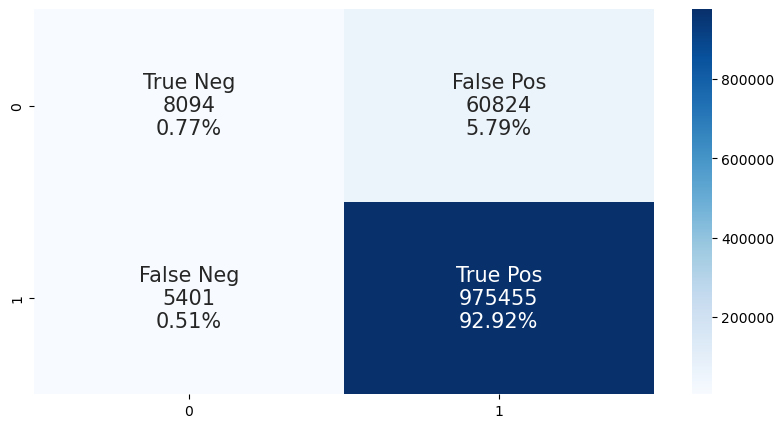

In [19]:
train_and_check_model(df, DecisionTreeClassifier(max_depth=5, random_state=0))

RandomForestClassifier(max_depth=5, random_state=0)
Features: ['Odległość do skrzyżowania', 'Year', 'Month', 'Weekday', 'Day', 'Dayofyear', 'County', 'Community', 'Voivodeship', 'Street', 'House Number', 'Road Number', 'Roundabout / Junction', 'Intersection with the street', 'Intersection with the road', 'Area', 'Road geometry', 'Intersection', 'Characteristics of the place of the event', 'Lighting', 'Atmospheric conditions', 'The type of incident', 'Type of road', 'Road surface', 'The condition of the surface', 'Traffic lights', 'Marking', 'Other reasons']
Accuracy: 0.9343496790737816



C:\Users\artur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\artur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Wypadek       0.00      0.00      0.00     68918
     Kolizja       0.93      1.00      0.97    980856

    accuracy                           0.93   1049774
   macro avg       0.47      0.50      0.48   1049774
weighted avg       0.87      0.93      0.90   1049774



C:\Users\artur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Weight,Feature
0.3423 ± 0.5143,The type of incident
0.2398 ± 0.4251,Characteristics of the place of the event
0.0877 ± 0.1541,Other reasons
0.0590 ± 0.1201,Road Number
0.0494 ± 0.1127,Street
0.0319 ± 0.0831,Intersection
0.0264 ± 0.0674,Type of road
0.0251 ± 0.0842,Area
0.0237 ± 0.0736,Voivodeship
0.0178 ± 0.0572,Community


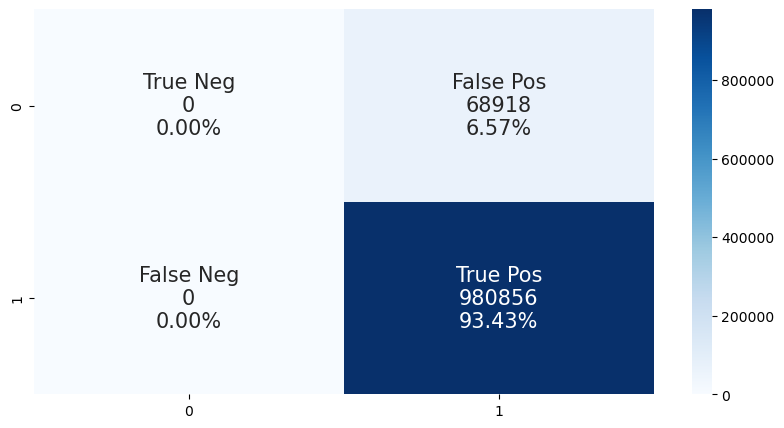

In [20]:
train_and_check_model(df, RandomForestClassifier(max_depth=5, random_state=0))

ExtraTreesClassifier(max_depth=5, random_state=0)
Features: ['Odległość do skrzyżowania', 'Year', 'Month', 'Weekday', 'Day', 'Dayofyear', 'County', 'Community', 'Voivodeship', 'Street', 'House Number', 'Road Number', 'Roundabout / Junction', 'Intersection with the street', 'Intersection with the road', 'Area', 'Road geometry', 'Intersection', 'Characteristics of the place of the event', 'Lighting', 'Atmospheric conditions', 'The type of incident', 'Type of road', 'Road surface', 'The condition of the surface', 'Traffic lights', 'Marking', 'Other reasons']
Accuracy: 0.9343496790737816



C:\Users\artur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\artur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Wypadek       0.00      0.00      0.00     68918
     Kolizja       0.93      1.00      0.97    980856

    accuracy                           0.93   1049774
   macro avg       0.47      0.50      0.48   1049774
weighted avg       0.87      0.93      0.90   1049774



C:\Users\artur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Weight,Feature
0.2112 ± 0.4240,Characteristics of the place of the event
0.1878 ± 0.4633,The type of incident
0.1139 ± 0.2363,Intersection
0.1092 ± 0.1831,Area
0.0633 ± 0.1688,Other reasons
0.0589 ± 0.1570,Type of road
0.0489 ± 0.1087,Year
0.0361 ± 0.1267,Voivodeship
0.0285 ± 0.0838,Community
0.0246 ± 0.1190,Road geometry


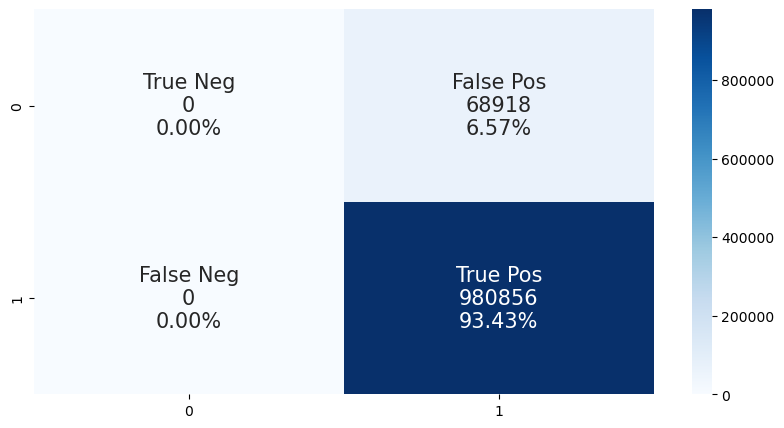

In [21]:
train_and_check_model(df, ExtraTreesClassifier(max_depth=5, random_state=0))